This is a notebook showing only the english feedback training procedure.
For the original notebook look for the gitlab repository
Datasets cannot be shared.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler

import nltk
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

In [3]:
import os

In [ ]:
os.getcwd()

In [5]:
os.chdir("/home/fernando/NLPfeedback_pass/notebooks")

Datasets cannot be shared.

In [7]:
health_english = pd.read_csv('../csv/health_english.csv')
health_english.head(2)

,idea,service_type,main_topic,idea_english,main_topic_english
0,Que Adra pudoera remimitirme a otro centro don...,Healthcare,AYUDAS / SERVICIOS ADICIONALES,That Adra could refer me to another center whe...,HELP / ADDITIONAL SERVICES
1,Vivo en el norte y para la consulta de laborat...,Healthcare,SERVICIOS ESPECÍFICOS,I live in the north and for the laboratory con...,SPECIFIC SERVICES


In [8]:
cash_english = pd.read_csv('../csv/cash_english.csv')
cash_english.head(2)

,idea,service_type,main_topic,idea_english,main_topic_english
0,Crear un plan de entrega de herramientas de tr...,Cash Transfer,APOYO PARA EMPRENDIMIENTOS,Create a delivery plan for work tools so that ...,SUPPORT FOR ENTREPRENEURSHIP
1,Acompañar este servicio de talleres motivacion...,Cash Transfer,CHARLAS / CAPACITACIONES,Accompany this service with motivational works...,TALKS / TRAINING


In [10]:
health_english['topic_id'] = health_english.main_topic_english.factorize()[0]
health_id_english = health_english[['main_topic_english','topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id_health_e = dict(health_id_english.values)
id_to_topic_health_e = dict(health_id_english[['topic_id','main_topic_english']].values)
health_english.head(3)

,idea,service_type,main_topic,idea_english,main_topic_english,topic_id
0,Que Adra pudoera remimitirme a otro centro don...,Healthcare,AYUDAS / SERVICIOS ADICIONALES,That Adra could refer me to another center whe...,HELP / ADDITIONAL SERVICES,0
1,Vivo en el norte y para la consulta de laborat...,Healthcare,SERVICIOS ESPECÍFICOS,I live in the north and for the laboratory con...,SPECIFIC SERVICES,1
2,Un trabajador social realice una visita socioe...,Healthcare,CENSO / CARACTERIZACIÓN / INSCRIPCIÓN,A social worker conducts a socioeconomic visit...,CENSUS / CHARACTERIZATION / REGISTRATION,2


In [11]:
cash_english['topic_id'] = cash_english.main_topic_english.factorize()[0]
cash_id_english = cash_english[['main_topic_english','topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id_cash_e = dict(cash_id_english.values)
id_to_topic_cash_e = dict(cash_id_english[['topic_id','main_topic_english']].values)
cash_english.head(3)

,idea,service_type,main_topic,idea_english,main_topic_english,topic_id
0,Crear un plan de entrega de herramientas de tr...,Cash Transfer,APOYO PARA EMPRENDIMIENTOS,Create a delivery plan for work tools so that ...,SUPPORT FOR ENTREPRENEURSHIP,0
1,Acompañar este servicio de talleres motivacion...,Cash Transfer,CHARLAS / CAPACITACIONES,Accompany this service with motivational works...,TALKS / TRAINING,1
2,"Quisiera recibir notificaciones vía SMS, donde...",Cash Transfer,OPERACIONES / PROCESOS,"I would like to receive notifications via SMS,...",OPERATIONS / PROCESSES,2


In [12]:
stop_spanish = stopwords.words('spanish')

In [13]:
keep=["no","sin","ni","poco","muy","mucho","muchos","contra","más"]
new_stop = [stop_spanish for stop_spanish in stop_spanish if stop_spanish not in keep]
list2 = ["través"]
new_stop.extend(list2)

In [14]:
stop_spanish = new_stop
stop_spanish[0:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [15]:
stop_eng = stopwords.words('english')

In [16]:
keep=["no","not","without","nor","little","very","much","against","more","doesn't","hasn't",
      "haven't","isn't","shouldn't","weren't","won't","wouldn't","didn't","couldn't","aren't","wasn't","don't"]
new_stop_eng = [stop_eng for stop_eng in stop_eng if stop_eng not in keep]

In [17]:
stop_english = new_stop_eng
stop_english[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# Support Vector Classifier

https://monkeylearn.com/blog/what-is-tf-idf/#:~:text=TF%2DIDF%20(term%20frequency%2D,across%20a%20set%20of%20documents.

In [21]:
ros = RandomOverSampler(random_state=0)
tfidf_transformer = TfidfTransformer()

## Cash

In [22]:
tfidf_cash_english = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', 
                                       ngram_range=(1, 2),stop_words = stop_english)

X_train_SVCE, X_test_SVCE, y_train_SVCE, y_test_SVCE = train_test_split(cash_english.idea_english, 
                                                                        cash_english.main_topic_english, 
                                                                        random_state=0)


In [33]:
X_train_SVCE[0:4]

3382     Without being able to leave home, it would sud...
31       Implement controls such as the delivery of inv...
6837     Along with the cash it would be nice to receiv...
12629    We provide the children with an education kit ...
Name: idea_english, dtype: object

In [ ]:
cash_feat_eng = tfidf_cash_english.fit_transform(X_train_SVCE).toarray()
X_res_SVCE, y_res_SVCE = ros.fit_resample(cash_feat_eng, y_train_SVCE)

In [34]:
cash_feat_eng[0:4]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

https://en.wikipedia.org/wiki/Support-vector_machine

In [ ]:
model_SVCE = LinearSVC()
model_SVCE.fit(X_res_SVCE, y_res_SVCE)
y_pred_SVCE = model_SVCE.predict(tfidf_cash_english.transform(X_test_SVCE))

In [ ]:
import pickle
# save model
pickle.dump(tfidf_cash_english, open('../app/pkl/tfidf_cash_english.pkl', 'wb'))
# https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle
pickle.dump(model_SVCE, open('../app/pkl/model_SVCE.pkl', 'wb'))

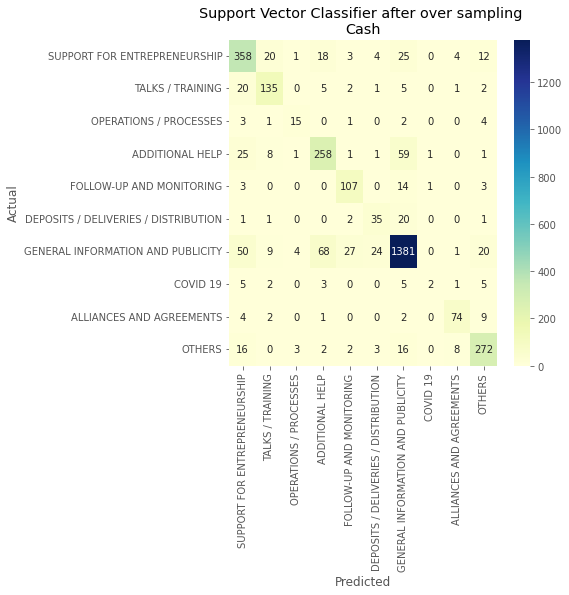

In [36]:
conf_mat_SVCE = confusion_matrix(y_test_SVCE, y_pred_SVCE)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat_SVCE, annot=True, fmt='d',
            xticklabels=cash_id_english.main_topic_english.values, 
            yticklabels=cash_id_english.main_topic_english.values, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Support Vector Classifier after over sampling \nCash')
plt.show()

In [ ]:
print(metrics.classification_report(y_test_SVCE, y_pred_SVCE, target_names=cash_english['main_topic_english'].unique()))

# Health

In [23]:
tfidf_health_english = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', 
                                       ngram_range=(1, 2),stop_words = stop_english)
X_train_SVHE, X_test_SVHE, y_train_SVHE, y_test_SVHE = train_test_split(health_english.idea_english, health_english.main_topic_english, random_state=0)
health_feat_eng = tfidf_health_english.fit_transform(X_train_SVHE).toarray()
X_res_SVHE, y_res_SVHE = ros.fit_resample(health_feat_eng, y_train_SVHE)
model_SVHE = LinearSVC()
model_SVHE.fit(X_res_SVHE, y_res_SVHE)
y_pred_SVHE = model_SVHE.predict(tfidf_health_english.transform(X_test_SVHE))

In [ ]:
import pickle
# save model
pickle.dump(tfidf_health_english, open('../app/pkl/tfidf_health_english.pkl', 'wb'))
# https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle
pickle.dump(model_SVHE, open('../app/pkl/model_SVHE.pkl', 'wb'))

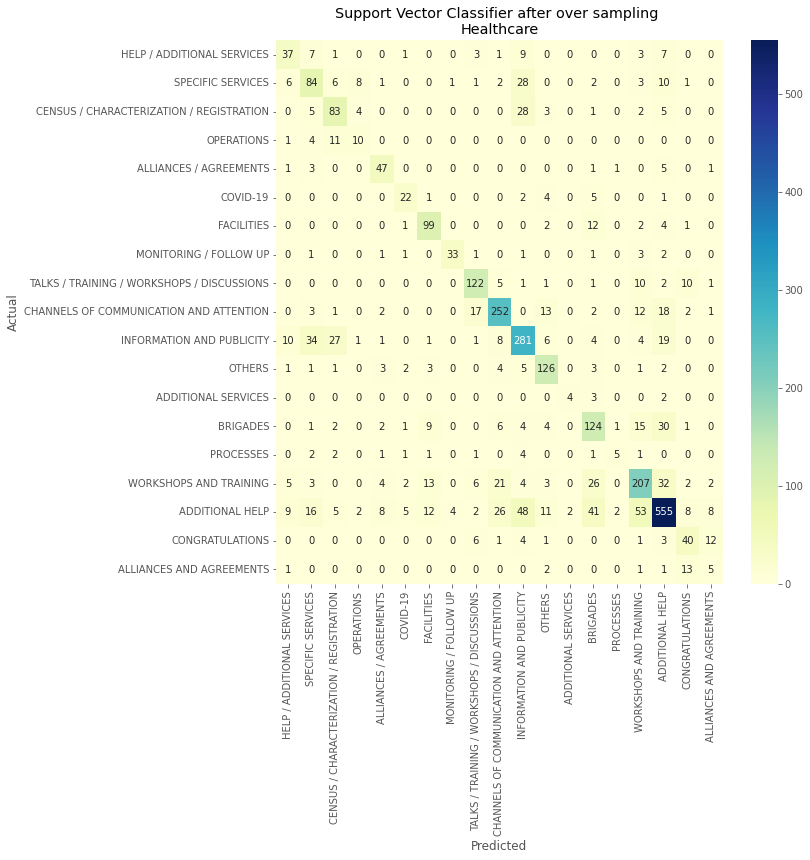

In [26]:
conf_mat_SVHE = confusion_matrix(y_test_SVHE, y_pred_SVHE)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat_SVHE, annot=True, fmt='d',
            xticklabels=health_id_english.main_topic_english.values, 
            yticklabels=health_id_english.main_topic_english.values, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Support Vector Classifier after over sampling \nHealthcare')
plt.show()

In [29]:
print(metrics.classification_report(y_test_SVHE, y_pred_SVHE, target_names=health_english['main_topic_english'].unique()))

                                            precision    recall  f1-score   support

                HELP / ADDITIONAL SERVICES       0.52      0.54      0.53        69
                         SPECIFIC SERVICES       0.51      0.55      0.53       153
  CENSUS / CHARACTERIZATION / REGISTRATION       0.60      0.63      0.61       131
                                OPERATIONS       0.40      0.38      0.39        26
                    ALLIANCES / AGREEMENTS       0.67      0.80      0.73        59
                                  COVID-19       0.61      0.63      0.62        35
                                FACILITIES       0.71      0.82      0.76       121
                    MONITORING / FOLLOW UP       0.87      0.75      0.80        44
TALKS / TRAINING / WORKSHOPS / DISCUSSIONS       0.76      0.80      0.78       153
   CHANNELS OF COMMUNICATION AND ATTENTION       0.77      0.78      0.78       323
                 INFORMATION AND PUBLICITY       0.67      0.71      0.69  